In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('perrin-freres-monthly-champagne.csv')

In [3]:
data

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [4]:
data.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [5]:
data1 = data.drop(index=[105,106])

In [6]:
data1

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [7]:
data1.columns=["Month","Sales"]

In [8]:
data1['Month']=pd.to_datetime(data1['Month'])

In [9]:
data1.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
data1.set_index('Month',inplace=True)
data1.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [11]:
data1.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

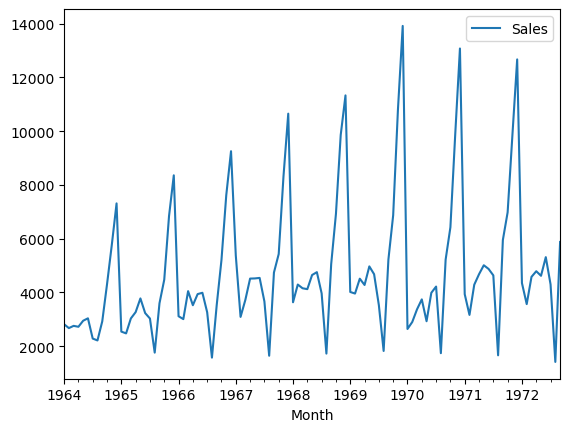

In [12]:
data1.plot()

In [13]:
from pandas.plotting import lag_plot

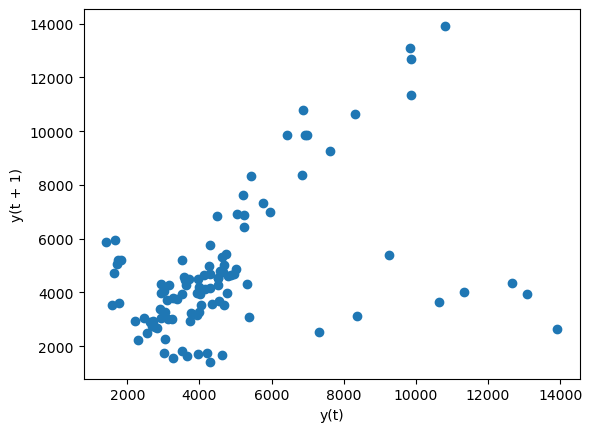

In [14]:
lag_plot(data1,lag=1)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(data1['Sales'])

In [17]:
#Ho: Non stationary
#H1: Stationary


def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(data1['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
data1['Sales First Difference'] = data1['Sales'] - data1['Sales'].shift(1)

In [19]:
data1['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [20]:
data1['Seasonal First Difference']=data1['Sales']-data1['Sales'].shift(12)

In [21]:
data1

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [22]:
data1.head(25)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
adfuller_test(data1['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

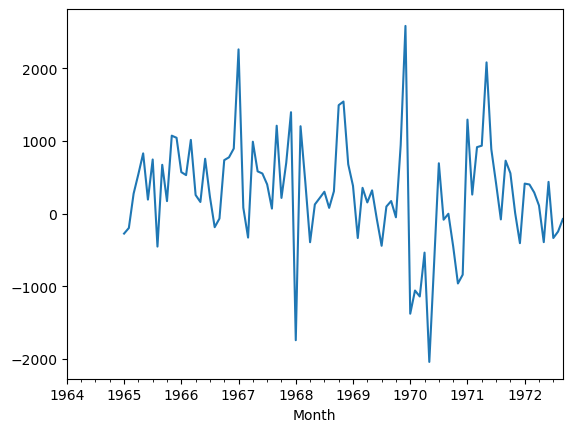

In [24]:
data1['Seasonal First Difference'].plot()

In [25]:
from pandas.plotting import autocorrelation_plot

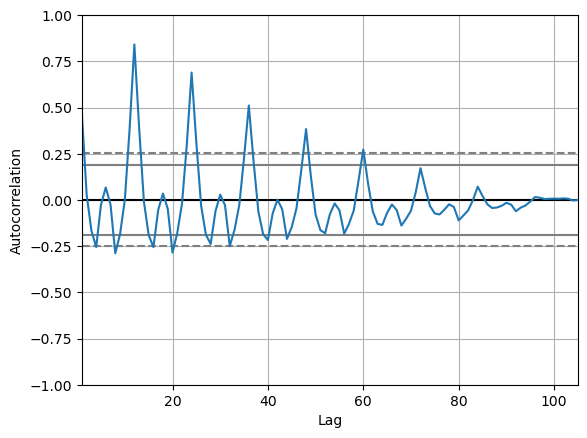

In [26]:
autocorrelation_plot(data1['Sales'])
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [28]:
import statsmodels as sm

C:\Users\pdine\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


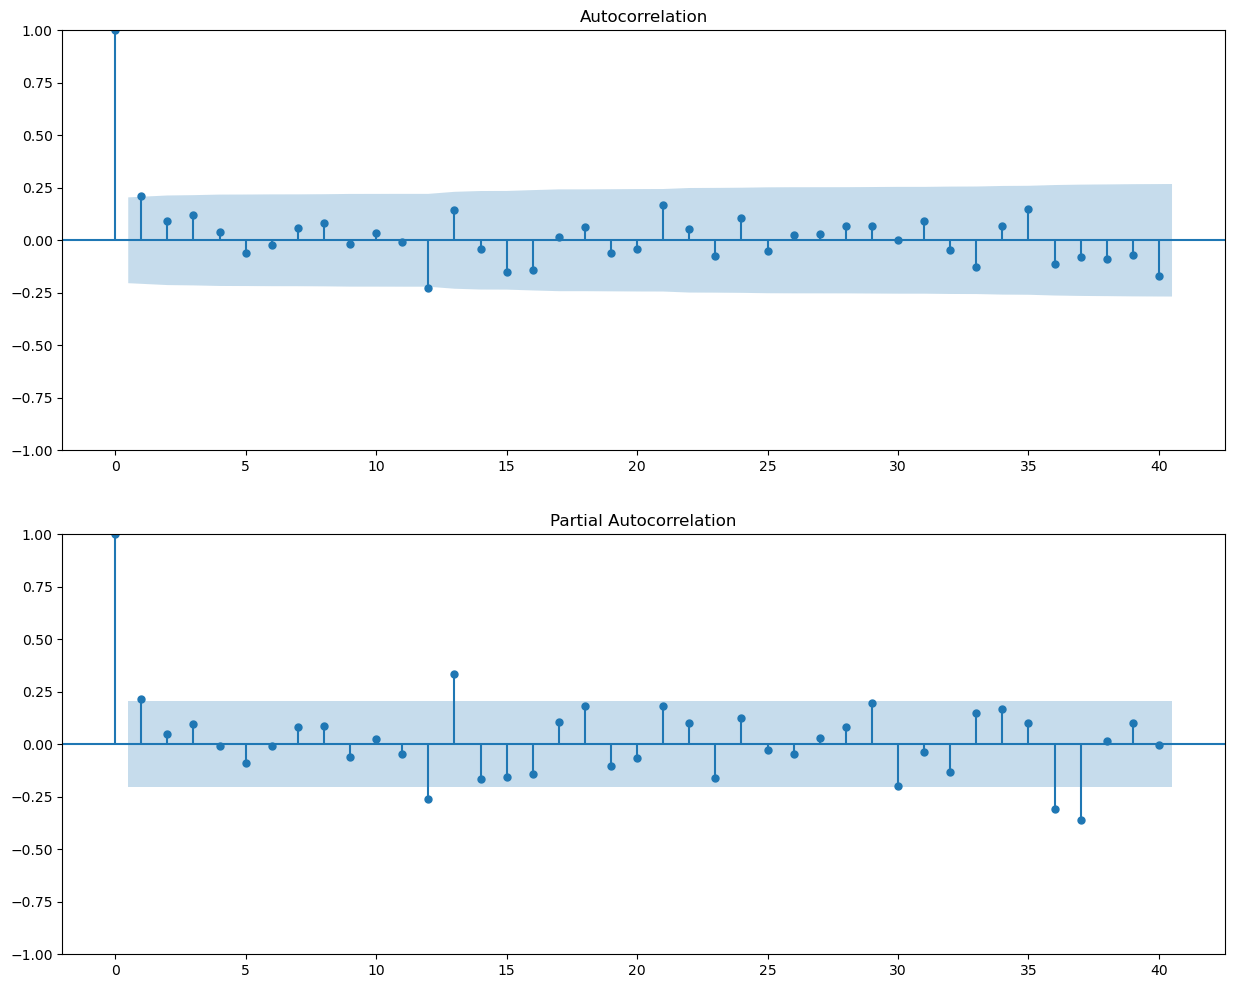

In [29]:
fig = plt.figure(figsize=(15,12))
axes1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(data1['Seasonal First Difference'].iloc[13:],lags=40,ax=axes1)
axes2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(data1['Seasonal First Difference'].iloc[13:],lags=40,ax=axes2)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

In [31]:
data2 = data1["Sales"]

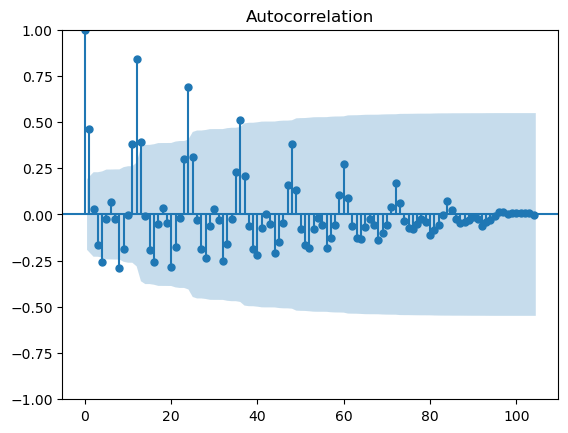

In [32]:
plot_acf(data2,lags=104)
plt.show()

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

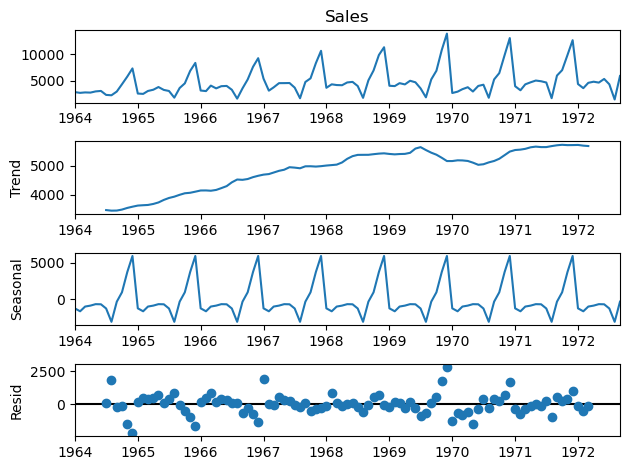

In [34]:
dec = seasonal_decompose(data2,period=12)
dec.plot()
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# For non-seasonal data
# p=1, d=1, q=0 or 1

model=ARIMA(data1['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\pdine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pdine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pdine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 05 May 2023   AIC                           1911.627
Time:                        17:49:20   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

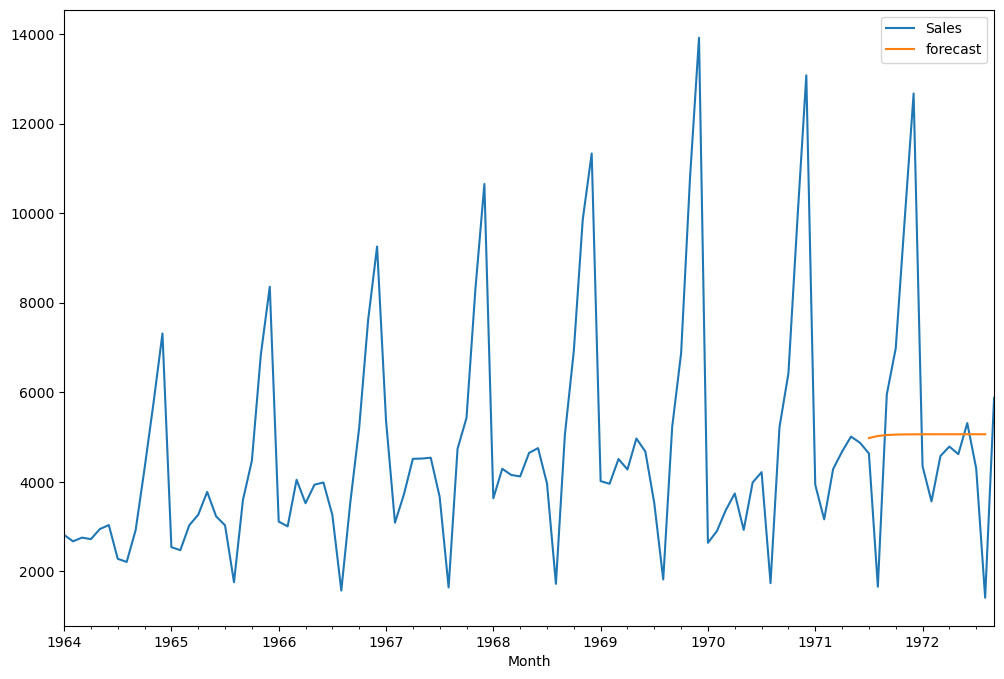

In [38]:
data1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data1[['Sales','forecast']].plot(figsize=(12,8))

In [39]:
import statsmodels.api as smf

In [40]:
model=smf.tsa.statespace.SARIMAX(data1['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\pdine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pdine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

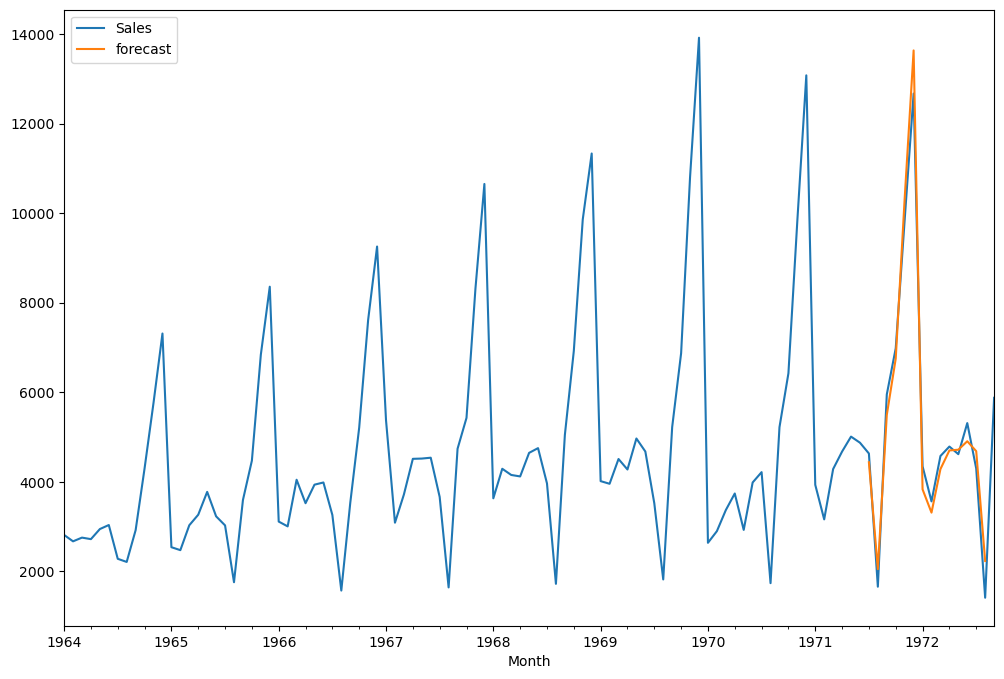

In [41]:
data1['forecast']=results.predict(start=90,end=103,dynamic=True)
data1[['Sales','forecast']].plot(figsize=(12,8))

In [42]:
from pandas.tseries.offsets import DateOffset
future_dates=[data1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [43]:
future_datatest=pd.DataFrame(index=future_dates[1:],columns=data1.columns)

In [44]:
future_df=pd.concat([data1,future_datatest])

<AxesSubplot:>

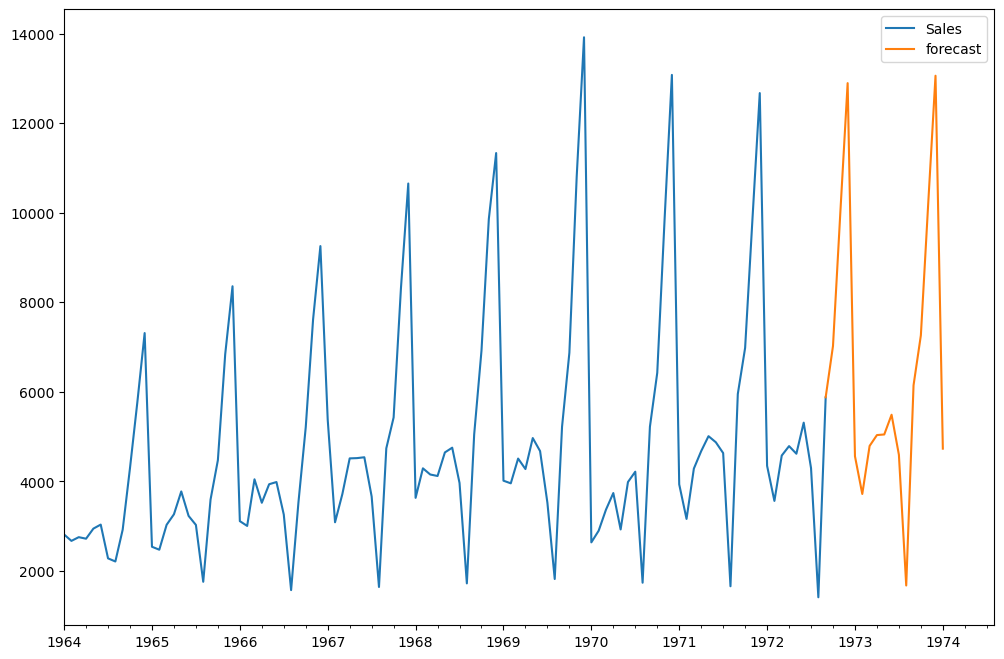

In [45]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 